In [2]:
import pandas as pd
import seaborn as sns


In [3]:
housing=pd.read_csv("train.csv")

In [4]:
numerical_feature=housing.select_dtypes(exclude=('bool','category','object'))

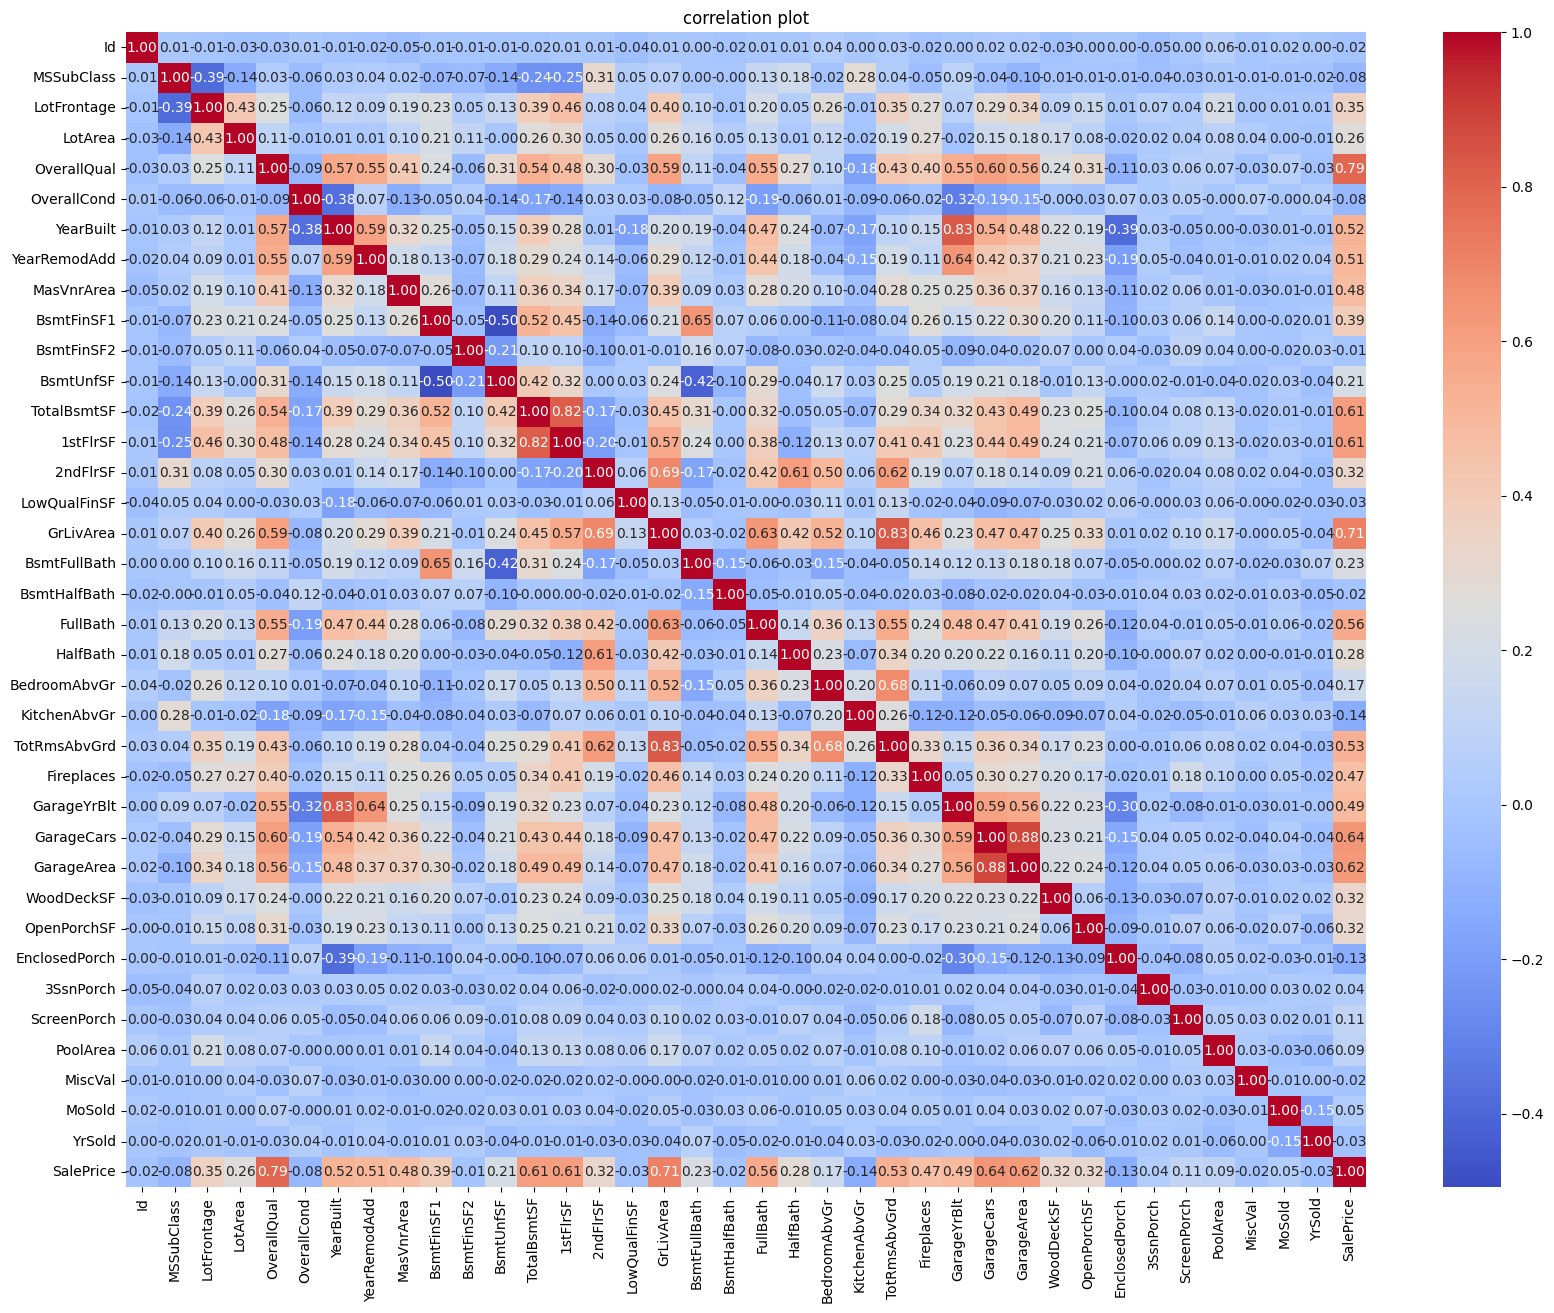

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sns.heatmap(numerical_feature.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation plot')
plt.show()

In [6]:
housing=housing.drop(['Id','MSSubClass','OverallCond','BsmtFinSF2','YrSold','MoSold','MiscVal','PoolArea','ScreenPorch'],axis=1)

In [7]:
housing.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,0,NaN,NaN,NaN,WD,Normal,208500
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,0,NaN,NaN,NaN,WD,Normal,181500
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,0,0,NaN,NaN,NaN,WD,Normal,223500
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,35,272,0,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,192,84,0,0,NaN,NaN,NaN,WD,Normal,250000


In [8]:
print(housing.isnull().sum())

MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
                 ... 
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
SalePrice           0
Length: 72, dtype: int64


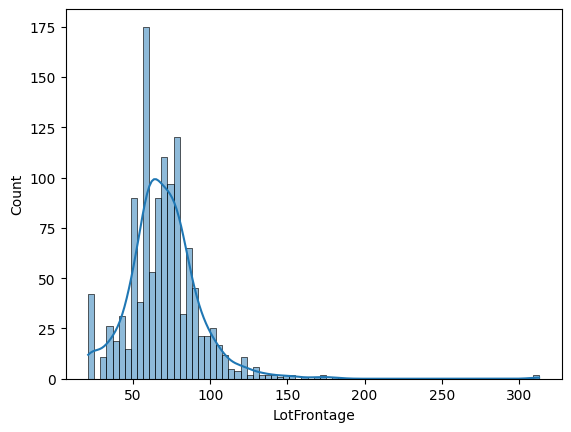

In [9]:
sns.histplot(housing['LotFrontage'],kde=True)
plt.show()


In [10]:
housing['LotFrontage'].fillna(housing['LotFrontage'].mean(),inplace=True)

In [11]:
print(housing['LotFrontage'].isnull().sum())


0


In [12]:
print(housing.isnull().sum())

MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
                 ... 
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
SalePrice           0
Length: 72, dtype: int64


In [13]:
housing['MasVnrArea'].fillna(housing['MasVnrArea'].mode()[0],inplace=True)

In [14]:
print(housing['MasVnrArea'].isnull().sum())

0


In [15]:
numerical_feature=housing.select_dtypes(exclude=('bool','object','category'))
x_train=numerical_feature.drop(['SalePrice'],axis=1)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
x_train.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,1,8,0,2003.0,2,548,0,61,0,0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,1,6,1,1976.0,2,460,298,0,0,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,1,6,1,2001.0,2,608,0,42,0,0
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,1,7,1,1998.0,3,642,0,35,272,0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,1,9,1,2000.0,3,836,192,84,0,0


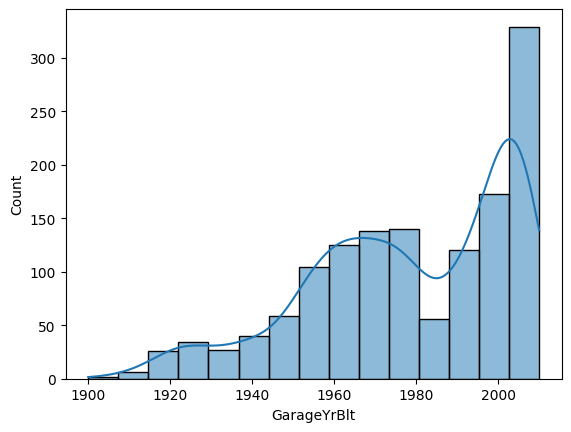

In [18]:
sns.histplot(x_train['GarageYrBlt'],kde=True)
plt.show()

In [19]:
x_train['GarageYrBlt'].fillna(x_train['GarageYrBlt'].median(),inplace=True)

In [20]:
lr=LinearRegression()
y=numerical_feature['SalePrice']
lr.fit(x_train,y)

LinearRegression()

In [21]:
test=pd.read_csv('test.csv')

In [22]:
x_test=test.drop(['Id','MSSubClass','OverallCond','BsmtFinSF2','YrSold','MoSold','MiscVal','PoolArea','ScreenPorch'],axis=1)

In [23]:
x_test.select_dtypes(exclude=('bool','category','object'))

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch
0,80.0,11622,5,1961,1961,0.0,468.0,270.0,882.0,896,...,1,5,0,1961.0,1.0,730.0,140,0,0,0
1,81.0,14267,6,1958,1958,108.0,923.0,406.0,1329.0,1329,...,1,6,0,1958.0,1.0,312.0,393,36,0,0
2,74.0,13830,5,1997,1998,0.0,791.0,137.0,928.0,928,...,1,6,1,1997.0,2.0,482.0,212,34,0,0
3,78.0,9978,6,1998,1998,20.0,602.0,324.0,926.0,926,...,1,7,1,1998.0,2.0,470.0,360,36,0,0
4,43.0,5005,8,1992,1992,0.0,263.0,1017.0,1280.0,1280,...,1,5,0,1992.0,2.0,506.0,0,82,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,1970,1970,0.0,0.0,546.0,546.0,546,...,1,5,0,NaN,0.0,0.0,0,0,0,0
1455,21.0,1894,4,1970,1970,0.0,252.0,294.0,546.0,546,...,1,6,0,1970.0,1.0,286.0,0,24,0,0
1456,160.0,20000,5,1960,1996,0.0,1224.0,0.0,1224.0,1224,...,1,7,1,1960.0,2.0,576.0,474,0,0,0
1457,62.0,10441,5,1992,1992,0.0,337.0,575.0,912.0,970,...,1,6,0,NaN,0.0,0.0,80,32,0,0


In [24]:
print(x_test.isnull().sum())

MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
                 ... 
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
Length: 71, dtype: int64


In [25]:
x_test['LotFrontage'].fillna(x_test['LotFrontage'].median(),inplace=True)

In [26]:
x_test['MasVnrArea'].fillna(x_test['MasVnrArea'].mode()[0],inplace=True)
x_test['GarageYrBlt'].fillna(x_test['GarageYrBlt'].median(),inplace=True)


In [27]:
x_test=x_test.select_dtypes(exclude=('bool','category','object'))

In [28]:
prediction=lr.predict(x_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print(x_test.isnull().sum())

LotFrontage      0
LotArea          0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       1
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       1
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
dtype: int64


In [ ]:
x_test['BsmtFinSF1'].fillna(x_test['BsmtFinSF1'].mean(),inplace=True)
x_test['GarageArea'].fillna(x_test['GarageArea'].mean(),inplace=True)
x_test['GarageCars'].fillna(x_test['GarageCars'].mean(),inplace=True)
x_test['BsmtHalfBath'].fillna(x_test['BsmtHalfBath'].mean(),inplace=True)
x_test['BsmtFullBath'].fillna(x_test['BsmtFullBath'].mean(),inplace=True)
x_test['BsmtUnfSF'].fillna(x_test['BsmtUnfSF'].mean(),inplace=True)
x_test['TotalBsmtSF'].fillna(x_test['TotalBsmtSF'].mean(),inplace=True)


In [ ]:
prediction=lr.predict(x_test)

In [ ]:
print(prediction)

[109358.62003307 160755.81532826 174410.68131515 ... 177027.68479799
 109330.27741846 252161.73639848]


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(prediction,y))

ValueError: Found input variables with inconsistent numbers of samples: [1459, 1460]

In [ ]:
y=y.drop('saleprice',axis=0)

KeyError: "['saleprice'] not found in axis"

In [ ]:
y=y.drop(2)

In [ ]:
print(mean_absolute_error(prediction,y))

80343.6454267678
